This is an analysis of manual line ROIs made in Fiji to measure diameter of 1o/2o/3o/4o order branches

See manualDiameter3 to parse original RoiSet.zip files into .csv

In [99]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.express as px
import seaborn as sns

from IPython.display import display # to prettyprint pandas table

import sanode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
groupColorDict = {
    '0': 'goldenrod',
    '1': 'red',
    '11': 'red', #'yellow'
    '2': 'green',
    '3': 'blue',
    '4': 'magenta',
    0: 'goldenrod',
    1: 'red',
    11: 'red', #'yellow'
    2: 'green',
    3: 'blue',
    4: 'magenta',
}

sns.set_context("talk") # ('notebook', paper', 'talk', 'poster')
plt.style.use('dark_background')
fontSize = 22
mpl.rcParams['axes.labelsize'] = fontSize # font size of x/y axes labels (not ticks)
mpl.rcParams['xtick.labelsize']=fontSize
mpl.rcParams['ytick.labelsize']=fontSize


In [101]:
# load the master .csv
masterPath = 'tracing_master.csv'
dfMaster = pd.read_csv(masterPath)

display(dfMaster.head())

#print(dfMaster[['sanStr', 'groupStr', 'masterVesselIdx']])

,Unnamed: 0,sanStr,origRegions,finalRegion,group,groupStr,diameter_um,length_um,z,x1,...,y1,y2,xMid,yMid,xVoxel,yVoxel,zVoxel,xMidOffset,yMidOffset,masterVesselIdx
0,0,SAN3,headMid,superior,1,1,27.985813,27.985813,45,1245.5,...,955.166687,956.833313,1268.0,956.0,0.621481,0.621481,1,NaN,NaN,0
1,1,SAN3,headMid,superior,1,1,28.459481,28.459481,45,1328.0,...,743.000000,767.000000,1347.5,755.0,0.621481,0.621481,1,NaN,NaN,0
2,2,SAN3,headMid,superior,1,1,28.076907,28.076907,45,1304.0,...,787.000000,808.000000,1324.0,797.5,0.621481,0.621481,1,NaN,NaN,0
3,3,SAN3,headMid,superior,1,1,25.305797,25.305797,45,1291.0,...,832.000000,849.000000,1309.5,840.5,0.621481,0.621481,1,NaN,NaN,0
4,4,SAN3,headMid,superior,1,1,24.859235,24.859235,45,1247.0,...,969.000000,969.000000,1267.0,969.0,0.621481,0.621481,1,NaN,NaN,0


Histogram of diameter across all SAN

No handles with labels found to put in legend.
No handles with labels found to put in legend.


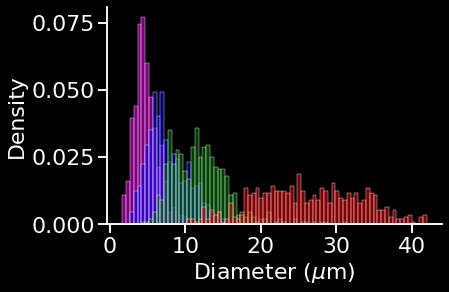

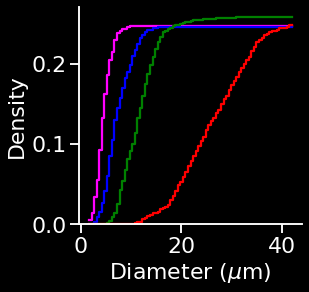

In [102]:
bins = 80
groupList = [1,2,3,4]
groupPlot = dfMaster[ dfMaster['group'].isin(groupList)]

fig, axs = plt.subplots(1,1, figsize=(6,4))
g = sns.histplot(data=groupPlot, bins=bins, x='diameter_um', hue='groupStr', palette=groupColorDict,
                #stat='probability',
                stat='density',
                ax=axs)
axs.set_xlabel('Diameter ($\mu$m)')
axs.legend(frameon=False)
#g.legend_.set_title('Branch Order')
sns.despine()

# cum
fig, axs = plt.subplots(1,1, figsize=(4,4))
g = sns.histplot(data=groupPlot, bins=bins, x='diameter_um', hue='groupStr', palette=groupColorDict,
                 cumulative=True,
                 stat='density',
                 element="step", fill=False,
                 ax=axs)
axs.set_xlabel('Diameter ($\mu$m)')
axs.legend(frameon=False)
#g.legend_.set_title('Branch Order')
sns.despine()

plt.show();

In [103]:
# display a table of mean/sd/n for diameter of each group
groupList = [1,2,3,4]
groupPlot = dfMaster[ dfMaster['group'].isin(groupList)]

desc = groupPlot.groupby('group')['diameter_um'].describe()
display(desc)

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
1,549.0,26.220007,6.874085,10.291843,21.182927,25.717955,31.684709,42.020518
2,571.0,11.962566,3.785627,4.481562,9.145016,11.586244,14.021247,31.065083
3,543.0,7.592928,2.621412,2.668172,5.720549,7.014754,9.288258,15.586661
4,547.0,4.779966,1.528888,1.639956,3.728885,4.509485,5.658569,10.921776


In [104]:
# get 1o/2o/3o/4o diameters and run mann witnet u test
group1 = dfMaster[ dfMaster['group'] == 1]['diameter_um'].tolist()
group2 = dfMaster[ dfMaster['group'] == 2]['diameter_um'].tolist()
group3 = dfMaster[ dfMaster['group'] == 3]['diameter_um'].tolist()
group4 = dfMaster[ dfMaster['group'] == 4]['diameter_um'].tolist()

# group 1 to group 2
# alternative from {None, ‘two-sided’, ‘less’, ‘greater’}
statistic1, p1 = scipy.stats.mannwhitneyu(group1, group2) #, alternative='two-sided')
statistic2, p2 = scipy.stats.mannwhitneyu(group2, group3) #, alternative='two-sided')
statistic3, p3 = scipy.stats.mannwhitneyu(group3, group4) #, alternative='two-sided')

print('group1 to group2:\t', p1)
print('group2 to group3:\t', p2)
print('group3 to group4:\t', p3)


group1 to group2:	 4.687800453429431e-160
group2 to group3:	 1.2807601931481697e-86
group3 to group4:	 1.1745127069001863e-78


# Diameter of primary artery (1o) in superior and inferior

,sanStr,group,finalRegion,mSegDiam,normSegDiam


SUPERIOR


,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
2,14.0,12.290781,2.426609,7.612929,11.393612,11.612939,13.433510,16.700317
3,16.0,7.166666,2.677556,3.346777,4.802602,6.976560,8.197761,12.142705
4,16.0,4.937723,1.575489,3.072303,3.512651,4.809312,5.854496,7.687294


INFERIOR


,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
2,8.0,12.022332,2.594368,8.113872,10.730586,11.656999,13.257199,16.653756
3,11.0,7.362912,1.672266,5.204932,5.917972,7.588130,8.433324,9.876213
4,10.0,4.812801,1.162455,3.054913,4.167784,4.801383,5.746406,6.317210


group 2 ind ttest pValue:	 0.810032687958855
group 3 ind ttest pValue:	 0.8313468413275004
group 4 ind ttest pValue:	 0.8308042010716885


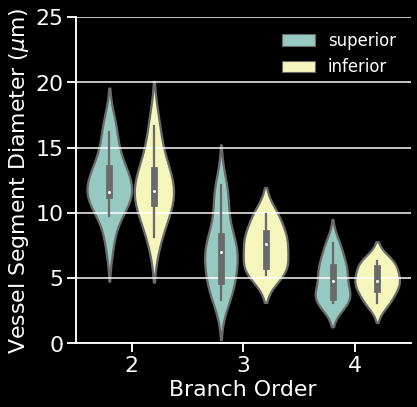

In [109]:
#display(dfMaster)
#theseGroups = [1,2,3,4]
theseGroups = [2,3,4]
tmpDf = None

sanStrList = dfMaster['sanStr'].unique()
for sanStr in sanStrList:
    oneSanDf = dfMaster[ dfMaster['sanStr']==sanStr ]
    
    if sanStr == 'SAN5':
        continue
    
    groupList = oneSanDf['group'].unique()
    for idx, group in enumerate(theseGroups):
        supDf = oneSanDf[ (oneSanDf['group']==group) & (oneSanDf['finalRegion']=='superior') ]
        infDf = oneSanDf[ (oneSanDf['group']==group) & (oneSanDf['finalRegion']=='inferior') ]
        
        supMeanSegList = supDf.groupby('masterVesselIdx')['diameter_um'].mean().tolist()
        infMeanSegList = infDf.groupby('masterVesselIdx')['diameter_um'].mean().tolist()
        
        # remove nan, [x for x in a if x != 20]
        supMeanSegList = [ x for x in supMeanSegList if not np.isnan(x)]
        infMeanSegList = [ x for x in infMeanSegList if not np.isnan(x)]
        
        supTmpMean = np.nanmean(supMeanSegList)
        infTmpMean = np.nanmean(infMeanSegList)
        
        # sup is always 100%
        supNormSegDiam = 100
        # inf is percent of sup
        infNormSegDiam = infTmpMean / supTmpMean * 100
                
        #
        # superior
        df0 = pd.DataFrame({
            'sanStr': sanStr,
            'group': group,
            'finalRegion': 'superior',
            'mSegDiam': supMeanSegList,
            'normSegDiam': supNormSegDiam,
        })
        if tmpDf is None:
            tmpDf = df0
        else:
            tmpDf = tmpDf.append(df0, ignore_index=True)

        #
        # inferior
        df0 = pd.DataFrame({
            'sanStr': sanStr,
            'group': group,
            'finalRegion': 'inferior',
            'mSegDiam': infMeanSegList,
            'normSegDiam': infNormSegDiam,
      })
        if tmpDf is None:
            tmpDf = df0
        else:
            tmpDf = tmpDf.append(df0, ignore_index=True)

with pd.option_context('display.max_rows', 6):
    display(tmpDf[ tmpDf['group']==1 ])

print('SUPERIOR')
tmpSupDf = tmpDf[ tmpDf['finalRegion']=='superior' ]
desc = tmpSupDf.groupby('group')['mSegDiam'].describe()
display(desc)
print('INFERIOR')
tmpInfDf = tmpDf[ tmpDf['finalRegion']=='inferior' ]
desc = tmpInfDf.groupby('group')['mSegDiam'].describe()
display(desc)

# run stats comparing each [group], finalSupMeanList versus finalInfMeanList
for idx, group in enumerate(theseGroups):
    supList = tmpDf [ (tmpDf['group']==group) & (tmpDf['finalRegion']=='superior') ]['mSegDiam'].tolist()
    infList = tmpDf [ (tmpDf['group']==group) & (tmpDf['finalRegion']=='inferior') ]['mSegDiam'].tolist()

    # wilcoxon expects equal/paired sample sizes
    #alternative = 'two-sided' #(“two-sided”, “greater”, “less”)
    #mode = 'exact'
    #stat, pValue = scipy.stats.wilcoxon(x=supList, y=infList, alternative=alternative, mode=mode)
    #print('wilcoxon pValue:\t', pValue)

    stat, pValue = scipy.stats.ttest_ind(supList, infList)
    print('group', group, 'ind ttest pValue:\t', pValue)

#
# plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

g = sns.violinplot(data=tmpDf, x='group', y='mSegDiam', hue='finalRegion',
               hue_order=['superior', 'inferior'],
               ax=ax)
ax.grid(which='major', axis='y')
ax.set_ylabel('Vessel Segment Diameter ($\mu$m)')
ax.set_xlabel('Branch Order')
ax.legend(frameon=False)
g.legend_.set_title('')
sns.despine()
ax.set_ylim([0,50])
ax.set_ylim([0,25])

plt.show()

,sanStr,group,finalRegion,mSegDiam,normSegDiam,Normalized Diameter (%)
0,SAN3,1,superior,26.123502,100.000000,100.000000
1,SAN3,1,inferior,24.746115,94.727403,94.727403
35,SAN4,1,superior,34.682581,100.000000,100.000000
36,SAN4,1,superior,26.174358,100.000000,100.000000
37,SAN4,1,inferior,18.941867,62.250476,62.250476
58,SAN6,1,superior,31.041731,100.000000,100.000000
59,SAN6,1,inferior,26.414651,85.094002,85.094002


[100, 100, 100]
[94.72740274423192, 62.250475642065894, 85.09400201481894]
wilcoxon pValue:	 0.25
paired ttest p	 0.18281691296731137


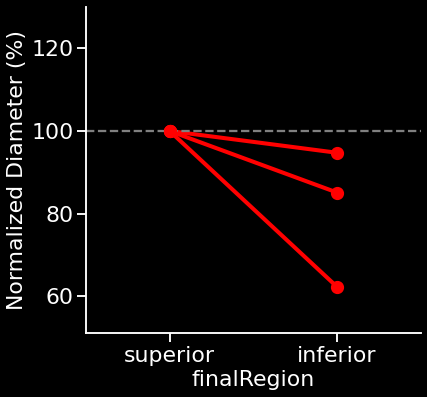

In [108]:
# plot primary artery diameter

groupOneDf = tmpDf[ tmpDf['group']==1 ].copy()

#groupOneDf = groupOneDf.reset_index()

# catplot will not plot to ax and we can't set x/y labels
groupOneDf['Normalized Diameter (%)'] = groupOneDf['normSegDiam']

display(groupOneDf)

fig, ax = plt.subplots(1,1, figsize=(6,6))

# ci=68 is supposed to show SEM around each point
# I want it around GRAND MEAN
g = sns.pointplot(x="finalRegion", y="Normalized Diameter (%)", hue="sanStr", data=groupOneDf,
                    ci=68,
                    palette={'r'}, # red because this is just primary (1o)
                    legend=False,
                 err_style="bars",
                ax=ax)
sns.despine()
#g.fig.set_figwidth(4)
#g.fig.set_figheight(4)
#g.set(ylim=(51, 130))
#g.axes[0][0].axhline(100, ls='--', c='k')
ax.axhline(y=100, ls='--', c="0.5")
ax.set_ylim(51, 130)
ax.legend().remove()

#axs[1].set_ylabel('Diameter (um)')
#axs[1].set_xlabel('Branch Order')
#axs[1].legend(frameon=False)
#g.legend_.set_title('')

# always 100
#supGroupOne = groupOneDf[ groupOneDf['finalRegion']=='superior' ]['normSegDiam'].tolist()
infGroupOne = groupOneDf[ groupOneDf['finalRegion']=='inferior' ]['normSegDiam'].tolist()
# remove san5 outlier
#infGroupOne.pop(2) # ASSUMING SAN5 is index 2
supGroupOne = [100] * len(infGroupOne)

print(supGroupOne)
print(infGroupOne)

alternative = 'two-sided' #(“two-sided”, “greater”, “less”)
mode = 'exact'
stat, pValue = scipy.stats.wilcoxon(x=supGroupOne, y=infGroupOne, alternative=alternative, mode=mode)
print('wilcoxon pValue:\t', pValue)

statistic, p = scipy.stats.ttest_rel(supGroupOne, infGroupOne)
print('paired ttest p\t', p)